<a href="https://www.kaggle.com/code/kaikaizxc/mobile-price-classification?scriptVersionId=110714610" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

In [1]:
import numpy as np 
import matplotlib.pyplot as plt 
import pandas as pd 
import seaborn as sns 

sns.set_style("darkgrid")

In [2]:
# input data 

df_train = pd.read_csv("../input/mobile-price-classification/train.csv")
df_test = pd.read_csv("../input/mobile-price-classification/test.csv")
df_train.sample(10)

battery_power  blue  clock_speed  dual_sim  fc  four_g  int_memory  \
247            1273     0          1.0         0   3       1          48   
1753            995     0          1.3         1   1       0          10   
948            1631     0          0.5         0   2       1          13   
966            1910     1          1.7         0   0       0          34   
94             1322     0          1.7         1   6       0           7   
496            1554     1          0.5         1  11       0           5   
246             862     1          0.8         1   3       0          23   
523            1413     0          0.5         1   5       0          51   
884             841     1          0.5         1   8       0          39   
1637           1695     1          0.5         1   2       1          47   

      m_dep  mobile_wt  n_cores  ...  px_height  px_width   ram  sc_h  sc_w  \
247     0.4         99        4  ...        490       886  1767    18    15   
1753    0.1        104        4  ...        258      1889   609    11     3   
948     0.5        166        2  ...        960      1735  2173    12     3   
966     0.6        115        2  ...        985      1284   309     8     4   
94      0.8        140        3  ...        177      1990  1418    19    17   
496     1.0        124        3  ...        395      1579  3635     7     4   
246     0.4        165        2  ...        793      1758   278    16     3   
523     0.3        117        5  ...        187       517  3383    16     5   
884     0.1        199        6  ...        546       828  2942    11     5   
1637    0.5        189        5  ...        308      1208  1629     8     6   

      talk_time  three_g  touch_screen  wifi  price_range  
247          11        1             1     0            1  
1753          5        1             0     1            0  
948           8        1             1     0            2  
966          10        0             0     1            0  
94           12        0             1     0            1  
496          18        0             0     0            3  
246          11        0             0     1            0  
523           2        0             0     0            3  
884          16        0             1     1            2  
1637         11        1             1     0            1  

[10 rows x 21 columns]

In [3]:
df_train.describe(include = "all")


battery_power       blue  clock_speed     dual_sim           fc  \
count    2000.000000  2000.0000  2000.000000  2000.000000  2000.000000   
mean     1238.518500     0.4950     1.522250     0.509500     4.309500   
std       439.418206     0.5001     0.816004     0.500035     4.341444   
min       501.000000     0.0000     0.500000     0.000000     0.000000   
25%       851.750000     0.0000     0.700000     0.000000     1.000000   
50%      1226.000000     0.0000     1.500000     1.000000     3.000000   
75%      1615.250000     1.0000     2.200000     1.000000     7.000000   
max      1998.000000     1.0000     3.000000     1.000000    19.000000   

            four_g   int_memory        m_dep    mobile_wt      n_cores  ...  \
count  2000.000000  2000.000000  2000.000000  2000.000000  2000.000000  ...   
mean      0.521500    32.046500     0.501750   140.249000     4.520500  ...   
std       0.499662    18.145715     0.288416    35.399655     2.287837  ...   
min       0.000000     2.000000     0.100000    80.000000     1.000000  ...   
25%       0.000000    16.000000     0.200000   109.000000     3.000000  ...   
50%       1.000000    32.000000     0.500000   141.000000     4.000000  ...   
75%       1.000000    48.000000     0.800000   170.000000     7.000000  ...   
max       1.000000    64.000000     1.000000   200.000000     8.000000  ...   

         px_height     px_width          ram         sc_h         sc_w  \
count  2000.000000  2000.000000  2000.000000  2000.000000  2000.000000   
mean    645.108000  1251.515500  2124.213000    12.306500     5.767000   
std     443.780811   432.199447  1084.732044     4.213245     4.356398   
min       0.000000   500.000000   256.000000     5.000000     0.000000   
25%     282.750000   874.750000  1207.500000     9.000000     2.000000   
50%     564.000000  1247.000000  2146.500000    12.000000     5.000000   
75%     947.250000  1633.000000  3064.500000    16.000000     9.000000   
max    1960.000000  1998.000000  3998.000000    19.000000    18.000000   

         talk_time      three_g  touch_screen         wifi  price_range  
count  2000.000000  2000.000000   2000.000000  2000.000000  2000.000000  
mean     11.011000     0.761500      0.503000     0.507000     1.500000  
std       5.463955     0.426273      0.500116     0.500076     1.118314  
min       2.000000     0.000000      0.000000     0.000000     0.000000  
25%       6.000000     1.000000      0.000000     0.000000     0.750000  
50%      11.000000     1.000000      1.000000     1.000000     1.500000  
75%      16.000000     1.000000      1.000000     1.000000     2.250000  
max      20.000000     1.000000      1.000000     1.000000     3.000000  

[8 rows x 21 columns]

In [4]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   battery_power  2000 non-null   int64  
 1   blue           2000 non-null   int64  
 2   clock_speed    2000 non-null   float64
 3   dual_sim       2000 non-null   int64  
 4   fc             2000 non-null   int64  
 5   four_g         2000 non-null   int64  
 6   int_memory     2000 non-null   int64  
 7   m_dep          2000 non-null   float64
 8   mobile_wt      2000 non-null   int64  
 9   n_cores        2000 non-null   int64  
 10  pc             2000 non-null   int64  
 11  px_height      2000 non-null   int64  
 12  px_width       2000 non-null   int64  
 13  ram            2000 non-null   int64  
 14  sc_h           2000 non-null   int64  
 15  sc_w           2000 non-null   int64  
 16  talk_time      2000 non-null   int64  
 17  three_g        2000 non-null   int64  
 18  touch_sc

In [5]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             1000 non-null   int64  
 1   battery_power  1000 non-null   int64  
 2   blue           1000 non-null   int64  
 3   clock_speed    1000 non-null   float64
 4   dual_sim       1000 non-null   int64  
 5   fc             1000 non-null   int64  
 6   four_g         1000 non-null   int64  
 7   int_memory     1000 non-null   int64  
 8   m_dep          1000 non-null   float64
 9   mobile_wt      1000 non-null   int64  
 10  n_cores        1000 non-null   int64  
 11  pc             1000 non-null   int64  
 12  px_height      1000 non-null   int64  
 13  px_width       1000 non-null   int64  
 14  ram            1000 non-null   int64  
 15  sc_h           1000 non-null   int64  
 16  sc_w           1000 non-null   int64  
 17  talk_time      1000 non-null   int64  
 18  three_g  

In [6]:
# looks like there are no null values, but we can check to be doubly sure 
df_train.isnull().sum()

battery_power    0
blue             0
clock_speed      0
dual_sim         0
fc               0
four_g           0
int_memory       0
m_dep            0
mobile_wt        0
n_cores          0
pc               0
px_height        0
px_width         0
ram              0
sc_h             0
sc_w             0
talk_time        0
three_g          0
touch_screen     0
wifi             0
price_range      0
dtype: int64

<p>Let's analyze the data here: </p>
<p>Our result is a categorical attribute 0, 1, 2, 3 </p>

<p>Data:</p>
<li>Battery power: How much power the battery has</li>
<li>Blue: Whether the battery has bluetooth or not</li>
<li>ClockSpeed: speed at which microprocessor executes instructions</li>
<li>Dual_Sim: Has dual sim support or not</li>
<li>fc: Front Camera mega pixels</li>
<li>four_g: Has 4G or not</li>
<li>int_memory: Internal Memory in Gigabyes</li>
<li>m_dep: Mobile Depth in cm</li>
<li>mobile_wt: Weight of mobile phone</li>
<li>n_cores: Number of cores of processor</li>
<li>pc: Primary Camera mega pixels</li>
<li>px_height: Pixel Resolution Height</li>
<li>px_width: Pixel Resolution Width</li>
<li>ram: Random Access Memory in Megabytes</li>
<li>sc_h: Screen Height of mobile in cm</li>
<li>sc_w: Screen Width of mobile in cm</li>
<li>talk_time: longest time that a single battery charge will last when you are talking</li>
<li>three_g: Has 3G or not</li>
<li>touch_screen: Has Touch Screen or not</li>
<li>wifi: Has wifi or not </li>

Maybe it's better to combine some of the features, lets do that:
<li>px_height + px_width --> px_dimension</li>
<li>sc_h + sc_w --> sc_dimension</li>


In [7]:
df_train["px_dimension"] = df_train["px_height"] * df_train["px_width"] 
df_train["sc_dimension"] = df_train["sc_h"] * df_train["sc_w"]

In [8]:
# drop features 
df_train = df_train.drop(columns = ["px_height", "px_width", "sc_h", "sc_w"], axis = 1)

In [9]:
numerical_attribs = ["battery_power", "clock_speed", "fc", "int_memory", "m_dep", "mobile_wt", "n_cores", "pc", "px_dimension", "ram", "sc_dimension", "talk_time"]
categorical_attribs = ["blue", "dual_sim", "four_g", "three_g", "touch_screen", "wifi"]
target = ["price_range"]

## Data Visualization & Analysis

<Figure size 720x864 with 0 Axes>

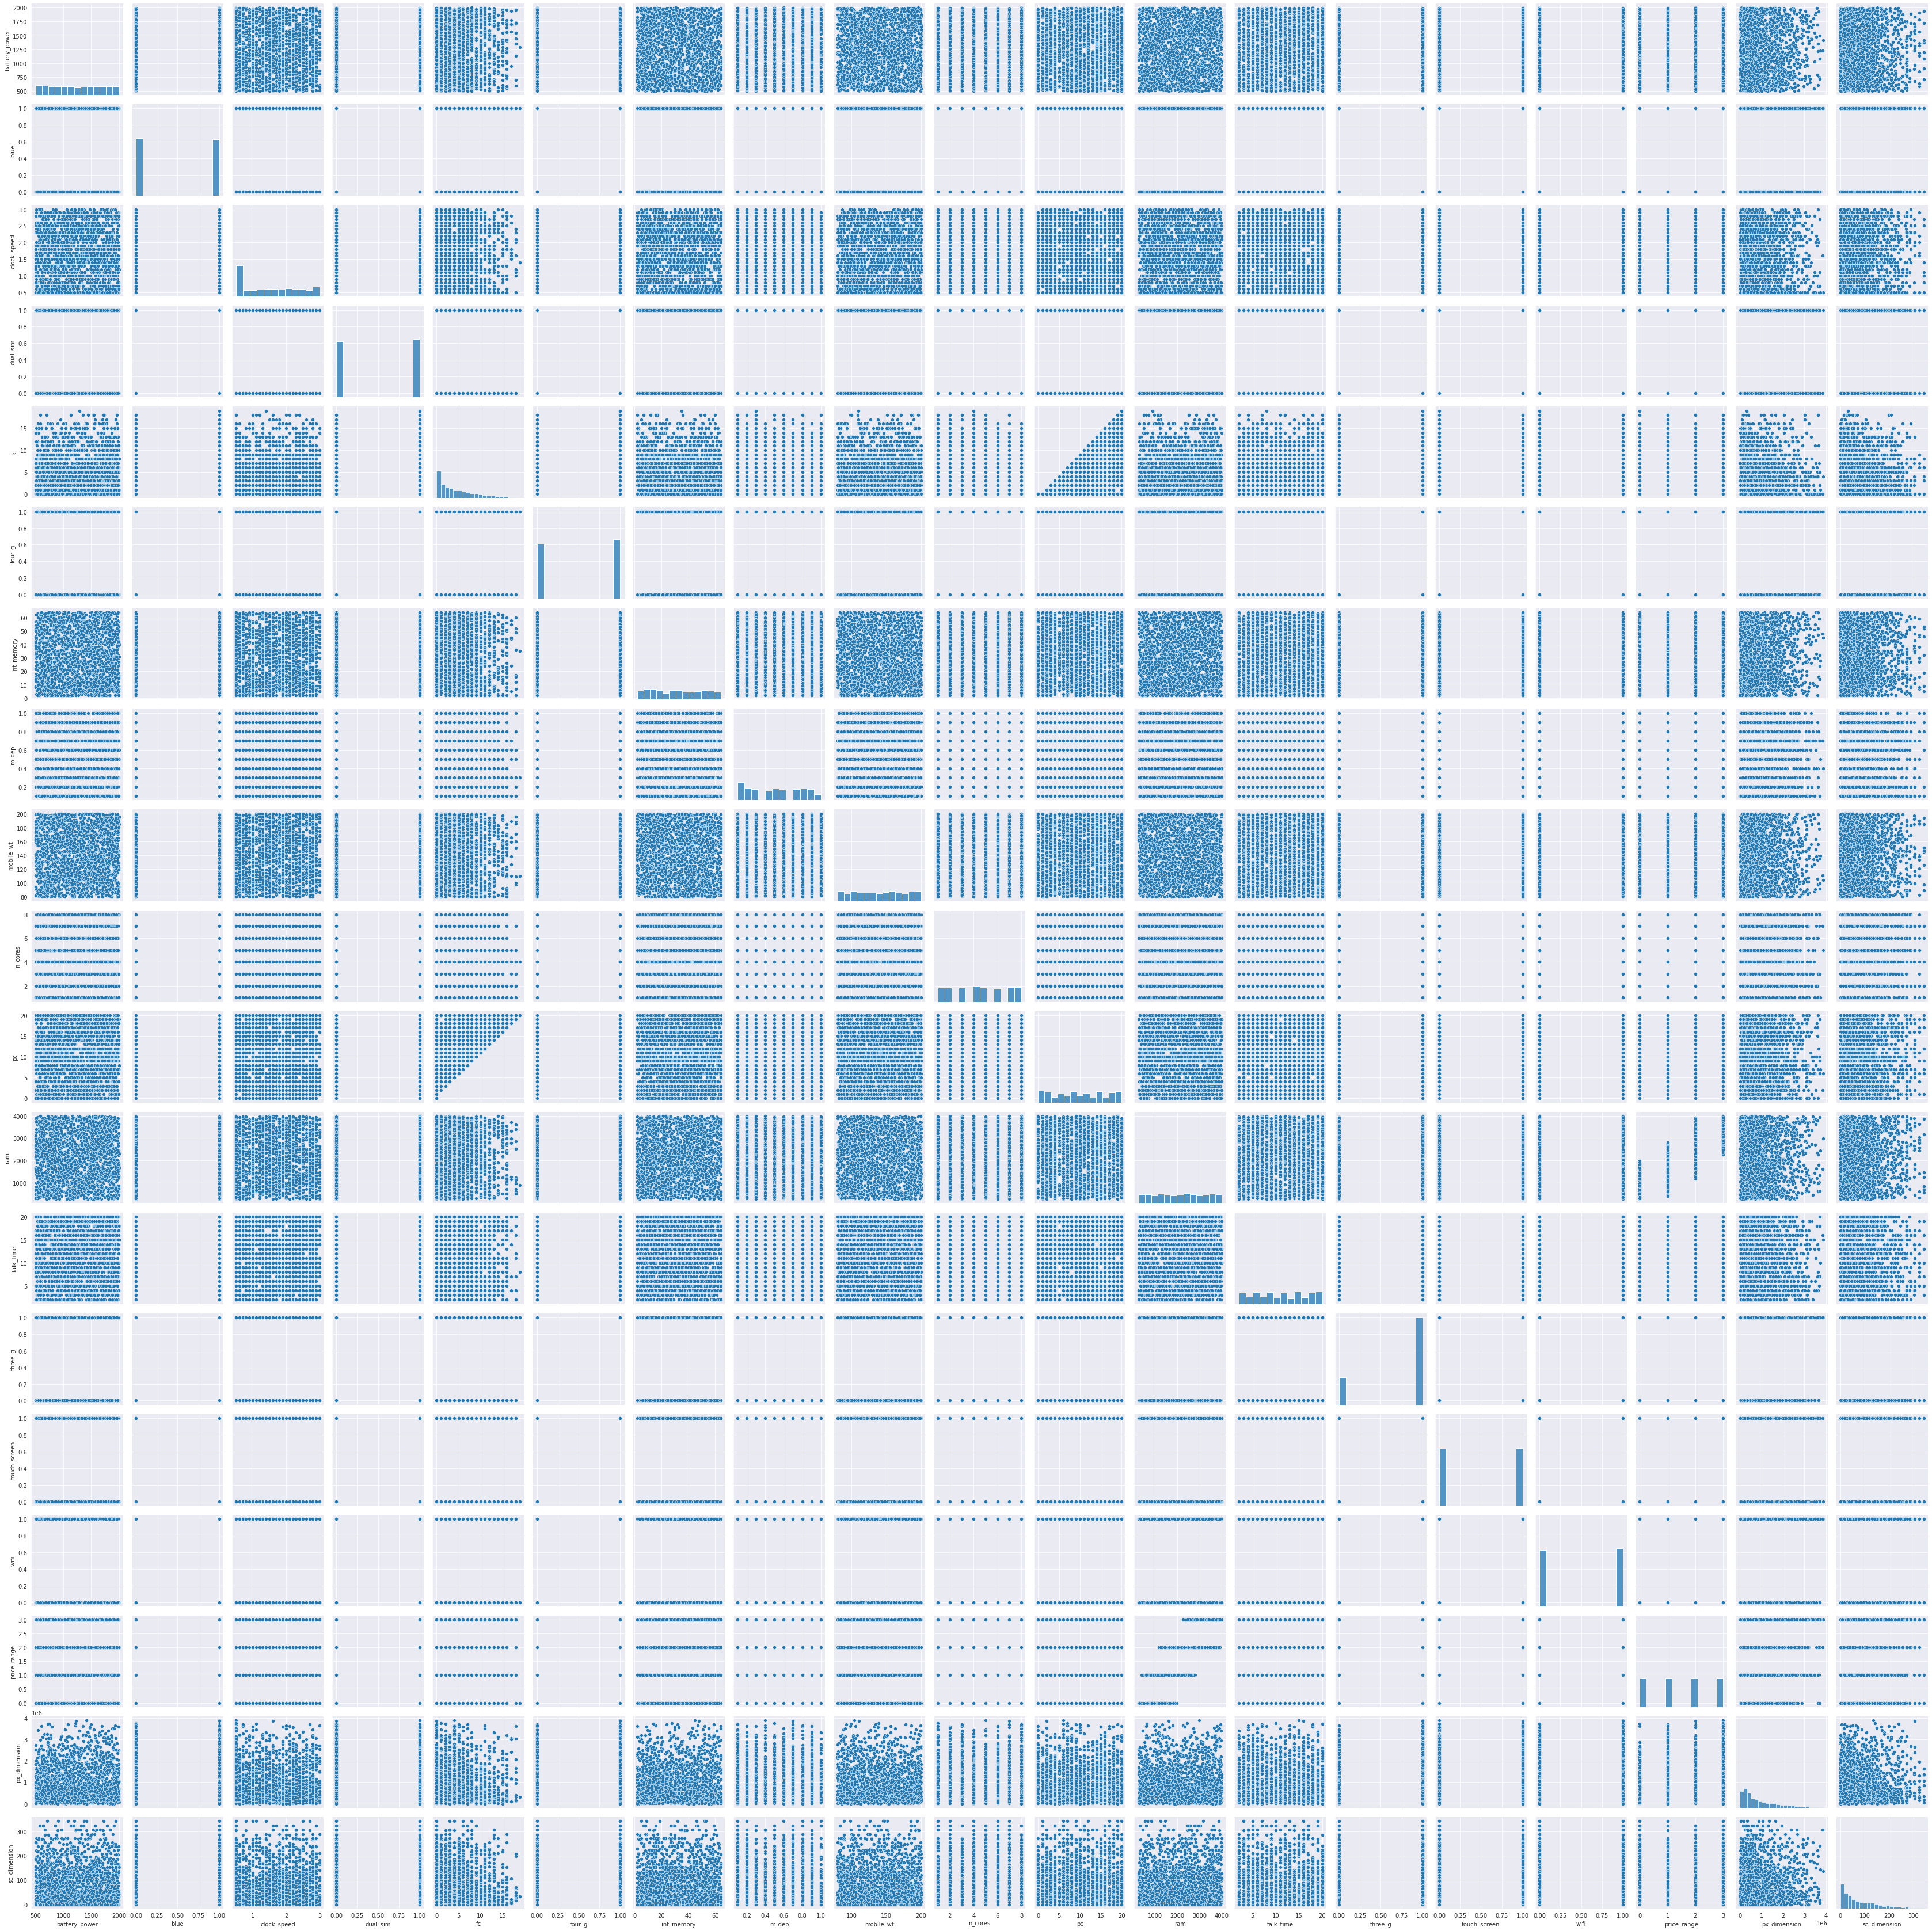

In [10]:
plt.figure(figsize = (10,12))

sns.pairplot(df_train)
plt.show()

<AxesSubplot:>

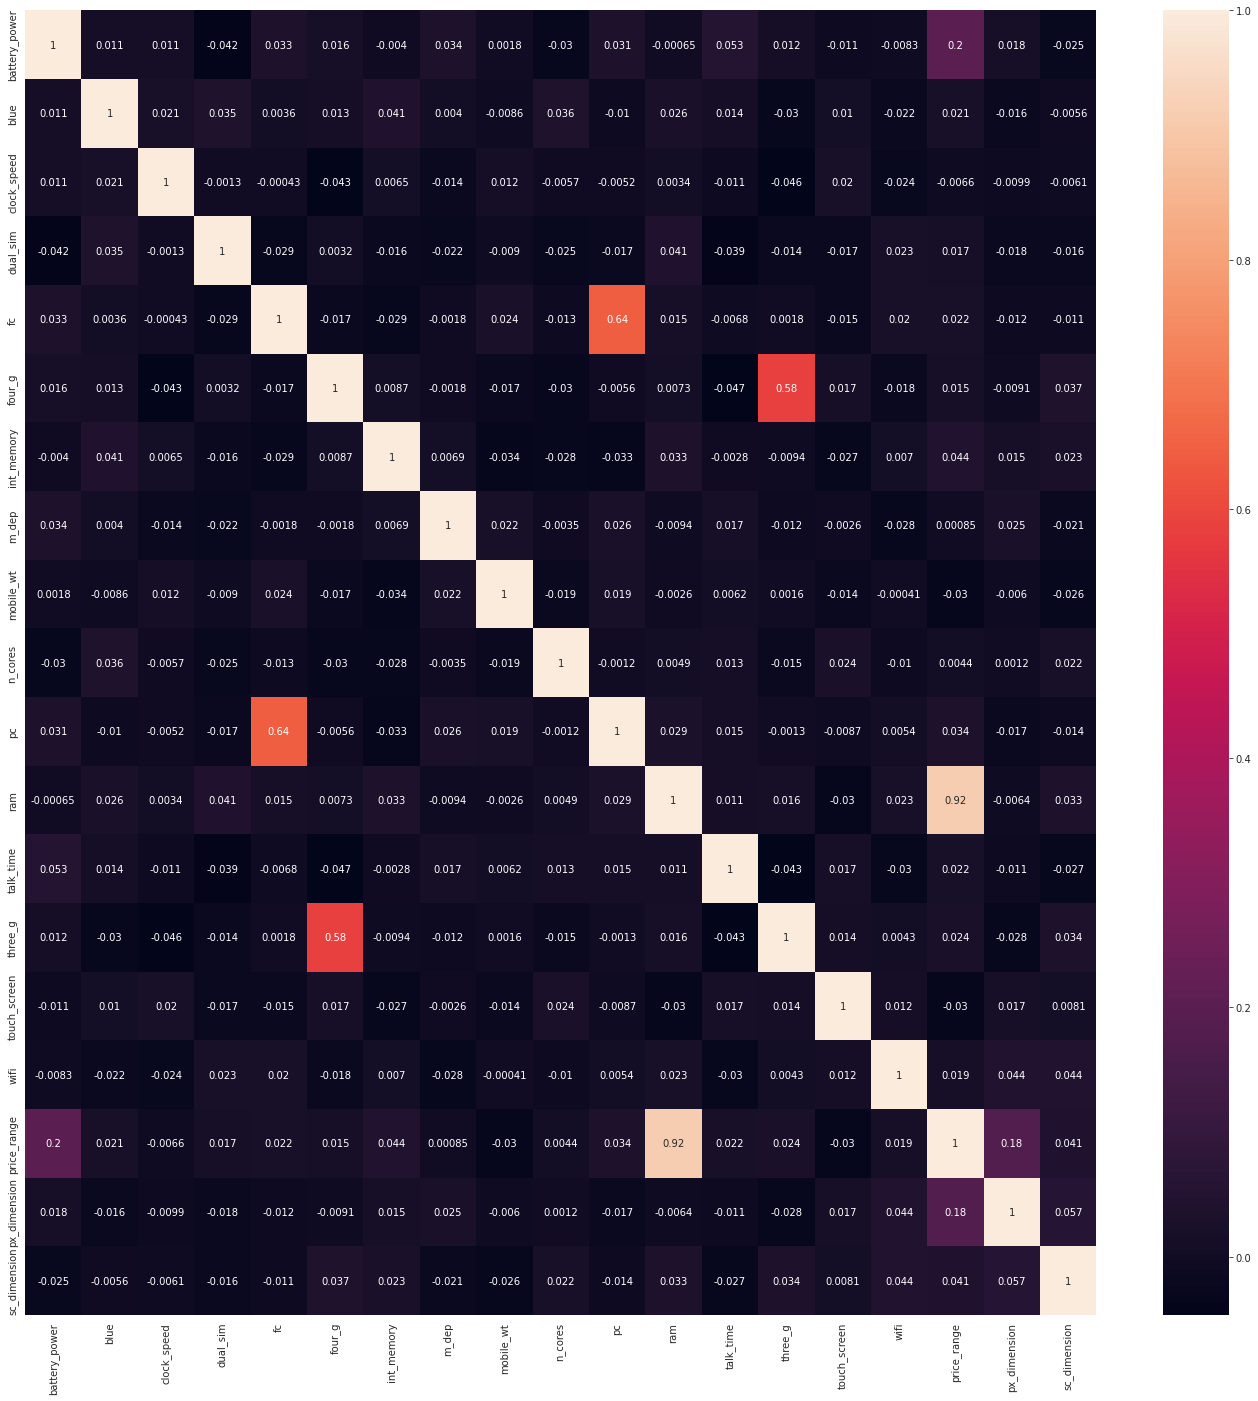

In [11]:
# its hard to see any strong correlations between any variable 
# lets try a correlation matrix with a heatmap instead 

cor = df_train.corr()
plt.figure(figsize = (24, 24))
sns.heatmap(cor, annot = True, cbar = True)

By observation, one can see that the following are quite strongly correlated:

<li>fc and pc</li>
<li>four_g and three_g</li>
<li>price_range and ram</li>

In [12]:
# by observation, one can see that these features are strongly correlated 
# as for the outcome price_range, ram is STRONGLY correlated with price, while px_dimension and battery power have weak correlations with price


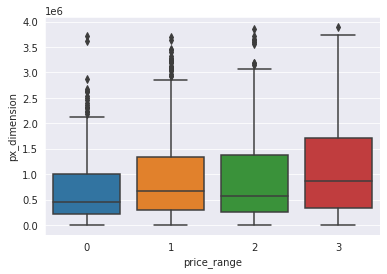

In [13]:
# lets observe the px_dimension 

sns.boxplot(x = "price_range", y = "px_dimension", data = df_train)
plt.show()

It's quite obvious that a bigger px dimension will lead to an increase in the price range, however, there seems to have quite alot of outliers in the model, but let's just stick with looking at the mean first 

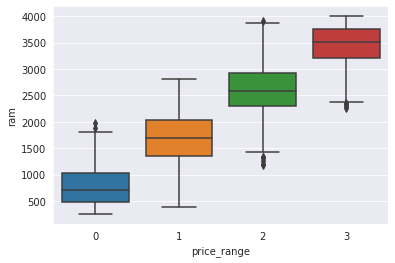

In [14]:
sns.boxplot(x = "price_range", y = "ram", data = df_train)
plt.show()

In [15]:
# I dont think that 0 dimension is supposed to be valid...? 
# lets drop the rows which have 0 px / sc dimensions 


df_train = df_train[(df_train["px_dimension"] != 0) & (df_train["sc_dimension"] != 0)]

I choose to do min-max scaling here because its impossible to have negative values for anything mobile related. (you cant have negative clock speed right?!)

In [16]:
from sklearn.pipeline import Pipeline 
from sklearn.preprocessing import MinMaxScaler
from sklearn.compose import ColumnTransformer

num_pipeline = Pipeline([
    ("min_max_scaler", MinMaxScaler())
])

full_pipeline = ColumnTransformer([
    ("num", num_pipeline, numerical_attribs)
], remainder = "passthrough")

prepared = full_pipeline.fit_transform(df_train.drop(columns = ["price_range"], axis = 1))


In [17]:
# splitting the data and building the model
y = df_train["price_range"]

In [18]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(prepared, y, test_size = 0.2, random_state = 0)

In [19]:
from sklearn.metrics import accuracy_score

In [20]:
from sklearn.linear_model import LogisticRegression

lm = LogisticRegression()
lm.fit(x_train, y_train)
y_pred = lm.predict(x_test)

print("Logistic Regression score: {}".format(accuracy_score(y_test, y_pred)))

Logistic Regression score: 0.8901098901098901


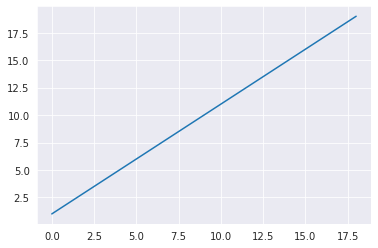

In [21]:
test = np.arange(1, 20)
plt.plot([i for i in range(len(test))], test)

Best N:14


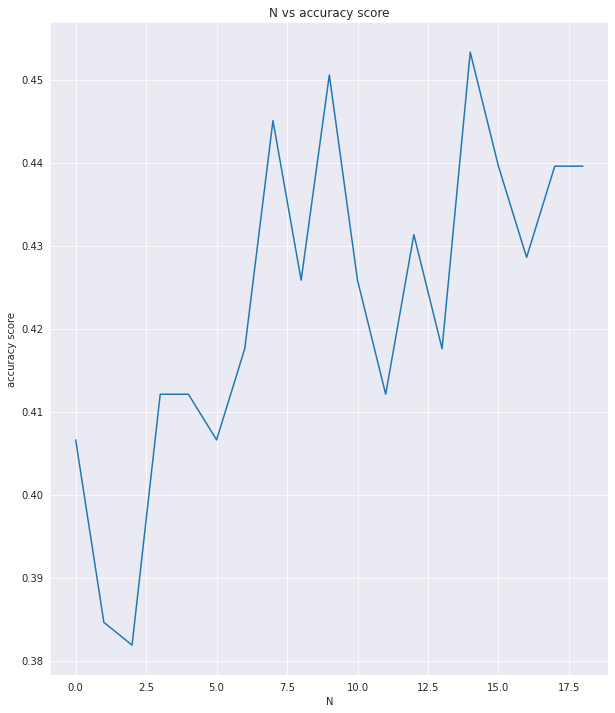

In [22]:

from sklearn.neighbors import KNeighborsClassifier 


# lets use elbow method for this one 
scores = []

for i in range(1, 20):
    KN = KNeighborsClassifier(n_neighbors = i)
    KN.fit(x_train, y_train)
    y_pred = KN.predict(x_test)
    scores.append(accuracy_score(y_test, y_pred))


plt.figure(figsize = (10, 12))
plt.plot(np.array([i for i in range(len(scores))]), scores)
plt.xlabel("N")
plt.ylabel("accuracy score")
plt.title("N vs accuracy score")
best = np.argmax(scores)
print("Best N:{}".format(best))

In [23]:
# for KN neighbours with a N of 14, 

KN_14 = KNeighborsClassifier(n_neighbors = 14)
KN_14.fit(x_train, y_train)
y_pred = KN_14.predict(x_test)
print("Score of KNN: {}".format(accuracy_score(y_test, y_pred)))


Score of KNN: 0.4175824175824176


In [24]:
from sklearn.tree import DecisionTreeClassifier
dtree = DecisionTreeClassifier()
dtree.fit(x_train, y_train)
y_pred = dtree.predict(x_test)
print("Score of Decision Tree: {}".format(accuracy_score(y_test, y_pred)))

Score of Decision Tree: 0.8543956043956044


dtree.get_params

In [25]:
# It looks like logistic regression performed the best, and the next are decision trees. 

# we could try with ANNs also actually. 


Conclusion: We found out that dimensions and RAM of a phone generally has large influence over its pricing range 

